Using Colab cache for faster access to the 'ipl-ball-by-ball-data-2008-2024' dataset.
Dataset downloaded to: /kaggle/input/ipl-ball-by-ball-data-2008-2024
Files in dataset folder:
/kaggle/input/ipl-ball-by-ball-data-2008-2024/ipl_cleaned_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               260920 non-null  object 
 1   outcome            260920 non-null  object 
 2   overs              260920 non-null  int64  
 3   season             260920 non-null  float64
 4   venue              260920 non-null  object 
 5   inning             260920 non-null  object 
 6   over               260920 non-null  int64  
 7   batter             260920 non-null  object 
 8   bowler             260920 non-null  object 
 9   non_striker        260920 non-null  object 
 10  runs_batter        260920 non-null  int64  
 11  

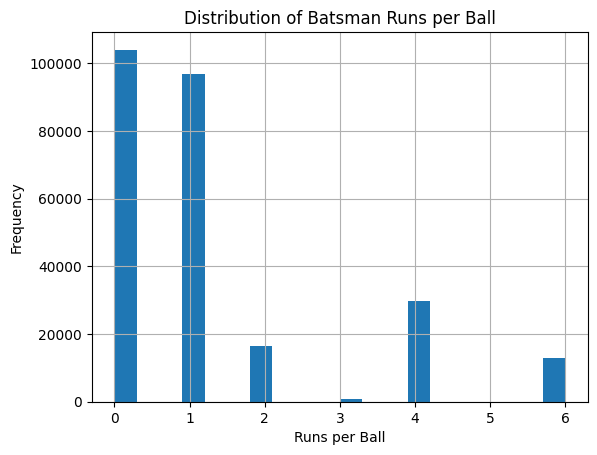

Top 10 wicket types:
wicket_kind
0                        247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
Name: count, dtype: int64

Wicket Flag Counts (1=wicket, 0=no wicket):
wicket_flag
1    260920
Name: count, dtype: int64
Wicket Flag Counts (1=wicket, 0=no wicket):
wicket_flag
0    247970
1     12950
Name: count, dtype: int64
Top 10 venues by number of balls played:
venue
Mumbai          50580
Dubai           26700
Delhi           22424
Eden Gardens    21846
Banglore        21824
Chennai         20706
Hyderabad       18355
RSA             16996
Jaipur          15901
Mohali          14476
Name: count, dtype: int64

Top 10 venues by average runs per ball:
venue
Indore          1.461578
Banglore        1.407258
Dharamshala     1.404648
Ahmed

In [ ]:
!pip install kagglehub
import kagglehub

# Download latest version of IPL ball-by-ball dataset
path = kagglehub.dataset_download("ecortv/ipl-ball-by-ball-data-2008-2024")

print("Dataset downloaded to:", path)
import os

print("Files in dataset folder:")
for root, dirs, files in os.walk(path):
    for f in files:
        print(os.path.join(root, f))
        import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/ipl-ball-by-ball-data-2008-2024/ipl_cleaned_data.csv")

# View first 5 rows
df.head()
df.shape
df.columns
df.info()
df.isnull().sum()
df[['runs_batter','runs_extras','runs_total']].describe()
import matplotlib.pyplot as plt

df['runs_batter'].hist(bins=20)
plt.title("Distribution of Batsman Runs per Ball")
plt.xlabel("Runs per Ball")
plt.ylabel("Frequency")
plt.show()
# 7A — Count top types of wickets
print("Top 10 wicket types:")
print(df['wicket_kind'].value_counts().head(10))

# 7B — Create numeric flag for wicket (1 if wicket, 0 otherwise)
df['wicket_flag'] = df['wicket_kind'].apply(lambda x: 0 if x == 'None' else 1)
print("\nWicket Flag Counts (1=wicket, 0=no wicket):")
print(df['wicket_flag'].value_counts())
# Convert wicket info to numeric correctly
# If wicket_kind is '0' or 'None', it is no wicket
df['wicket_flag'] = df['wicket_kind'].apply(lambda x: 0 if x in ['0','None'] else 1)

# Check counts
print("Wicket Flag Counts (1=wicket, 0=no wicket):")
print(df['wicket_flag'].value_counts())
# Top 10 venues by number of matches
venue_counts = df['venue'].value_counts().head(10)
print("Top 10 venues by number of balls played:")
print(venue_counts)

# Average runs per ball at each of top 10 venues
venue_avg_runs = df.groupby('venue')['runs_total'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 venues by average runs per ball:")
print(venue_avg_runs)
# Average runs per ball by team_A
teamA_avg_runs = df.groupby('team_A')['runs_total'].mean().sort_values(ascending=False)
print("Average runs per ball by Team A:")
print(teamA_avg_runs)

# Total wickets taken by team_B
teamB_total_wickets = df[df['wicket_flag']==1].groupby('team_B')['wicket_flag'].sum().sort_values(ascending=False)
print("\nTotal wickets taken by Team B:")
print(teamB_total_wickets)











